In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
from Data_definition import Data
from functions import computeCurrents, dydt

T  = 100
dt = 0.001

In [3]:
y_init = np.array([Data['initial_VS'],
                   Data['initial_VD'],
                   Data['initial_w' ],
                   Data['initial_n' ],
                   Data['initial_h' ],
                   Data['initial_c' ],
                   Data['initial_q' ],
                   Data['initial_Ca']])

t_span = (0, T)
t_eval = np.arange(*t_span, dt)

sol = scipy.integrate.solve_ivp(fun = lambda t, y: dydt(t, y, Data),
                                t_span = t_span,
                                y0 = y_init,
                                t_eval = t_eval,
                                method = 'RK45',
                                atol = 1e-6,
                                rtol = 1e-6)

if not sol.success:
    raise RuntimeError("ODE solver failed: " + sol.message)

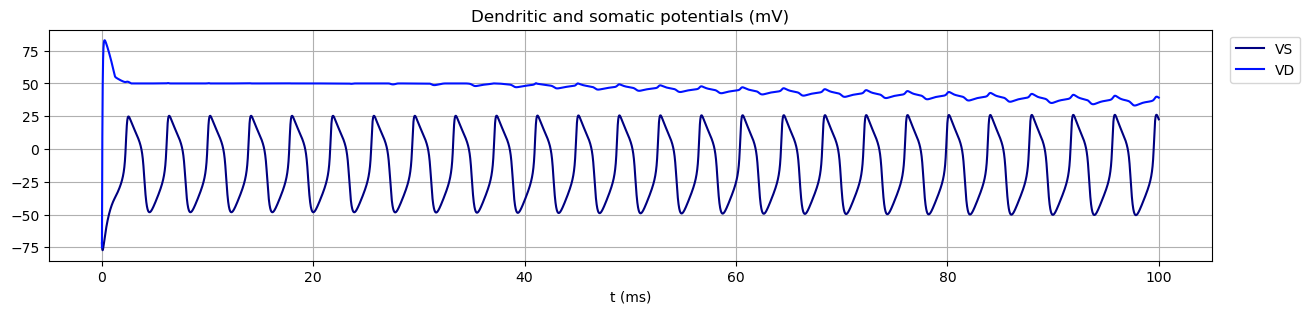

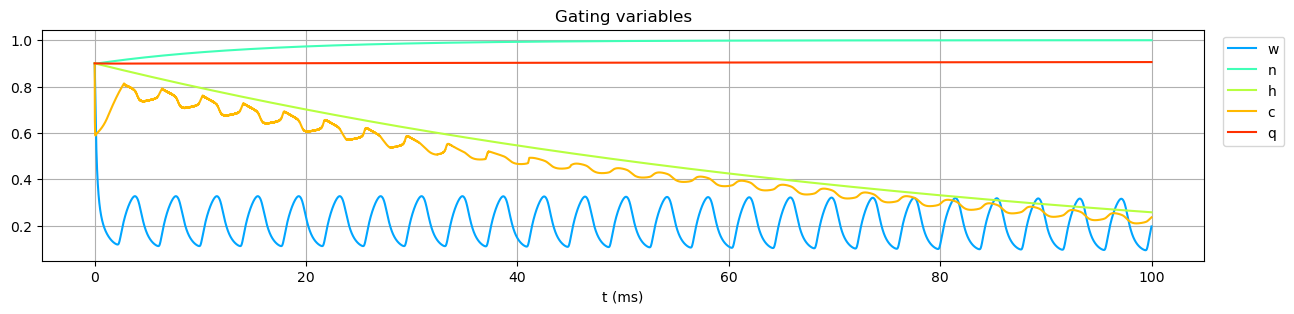

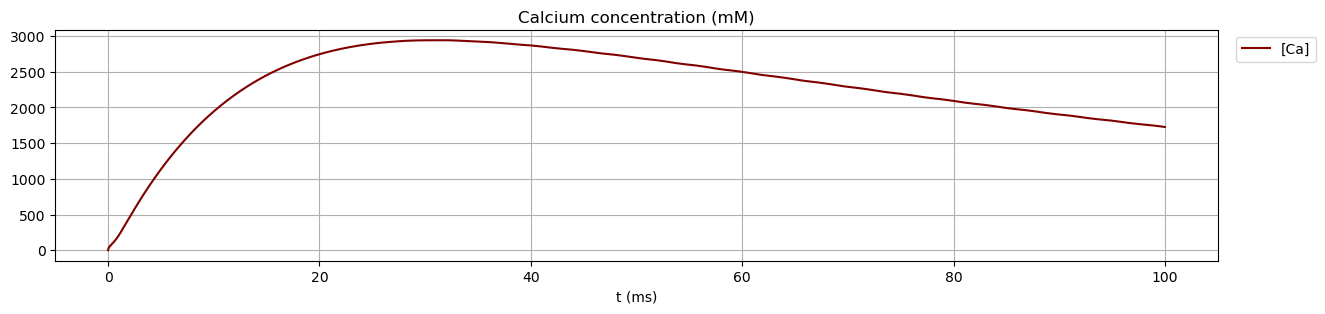

In [4]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 8))
figsize = (15, 3)

plt.figure(figsize=figsize)
plt.plot(sol.t, sol.y[0], label='VS', color=colors[0])
plt.plot(sol.t, sol.y[1], label='VD', color=colors[1])
plt.xlabel('t (ms)')
plt.title('Dendritic and somatic potentials (mV)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(sol.t, sol.y[2], label='w', color=colors[2])
plt.plot(sol.t, sol.y[3], label='n', color=colors[3])
plt.plot(sol.t, sol.y[4], label='h', color=colors[4])
plt.plot(sol.t, sol.y[5], label='c', color=colors[5])
plt.plot(sol.t, sol.y[6], label='q', color=colors[6])
plt.xlabel('t (ms)')
plt.title('Gating variables')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(sol.t, sol.y[7], label='[Ca]', color=colors[7])
plt.xlabel('t (ms)')
plt.title('Calcium concentration (mM)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

In [5]:
IS, ID, IDS, INa, IK, ISL, ICa, IKC, IKAHP, IDL = np.zeros((10, sol.t.shape[0]))

for i in range(sol.t.shape[0]):
    IS_, ID_, IDS_, INa_, IK_, ISL_, ICa_, IKC_, IKAHP_, IDL_ = computeCurrents(sol.y[:, i], Data)
    IS[i]   = IS_
    ID[i]   = ID_
    IDS[i]  = IDS_
    INa[i]  = INa_
    IK[i]   = IK_
    ISL[i]  = ISL_
    ICa[i]  = ICa_
    IKC[i]  = IKC_
    IKAHP[i]= IKAHP_
    IDL[i]  = IDL_

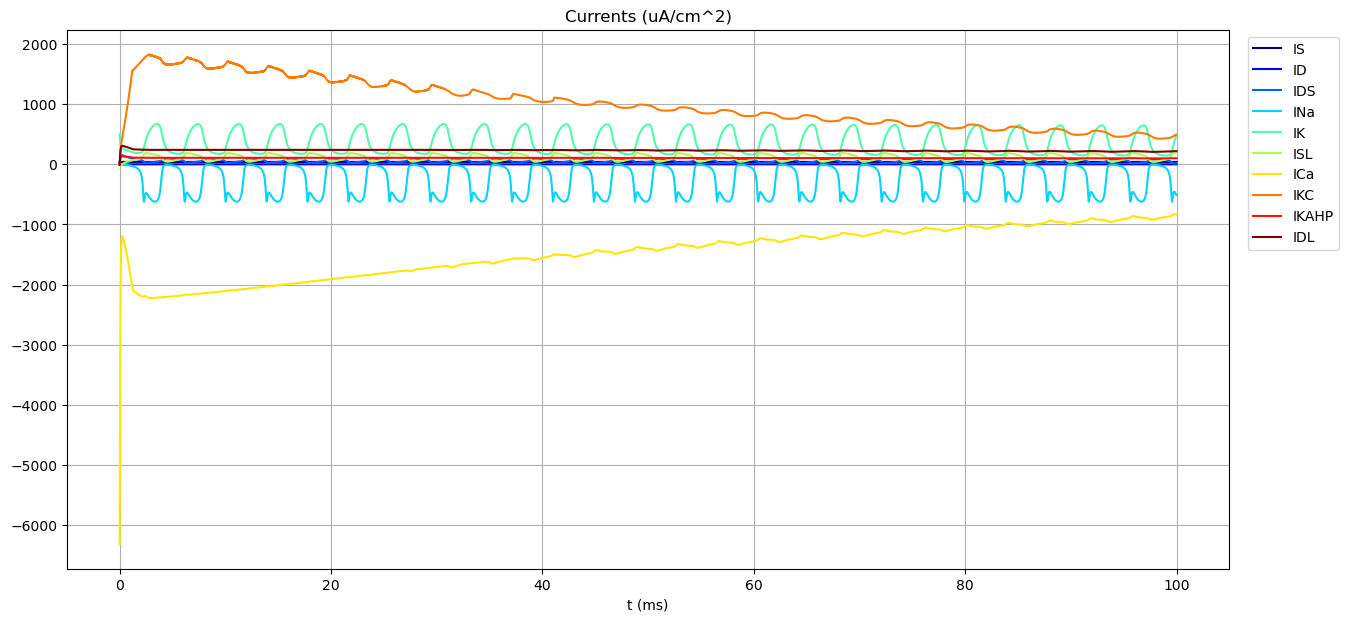

In [6]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 10))
figsize=(15, 7)

plt.figure(figsize=figsize)
plt.plot(sol.t, IS   , label='IS'   , color=colors[0])
plt.plot(sol.t, ID   , label='ID'   , color=colors[1])
plt.plot(sol.t, IDS  , label='IDS'  , color=colors[2])
plt.plot(sol.t, INa  , label='INa'  , color=colors[3])
plt.plot(sol.t, IK   , label='IK'   , color=colors[4])
plt.plot(sol.t, ISL  , label='ISL'  , color=colors[5])
plt.plot(sol.t, ICa  , label='ICa'  , color=colors[6])
plt.plot(sol.t, IKC  , label='IKC'  , color=colors[7])
plt.plot(sol.t, IKAHP, label='IKAHP', color=colors[8])
plt.plot(sol.t, IDL  , label='IDL'  , color=colors[9])
plt.xlabel('t (ms)')
plt.title('Currents (uA/cm^2)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()
